In [1]:
## import some modules between which also our HamFit_py

import HamF_py as hamf
from iminuit import Minuit
import numpy as np
import pyhf
import matplotlib.pyplot as plt
import modifier

/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses

Welcome to JupyROOT 6.28/04


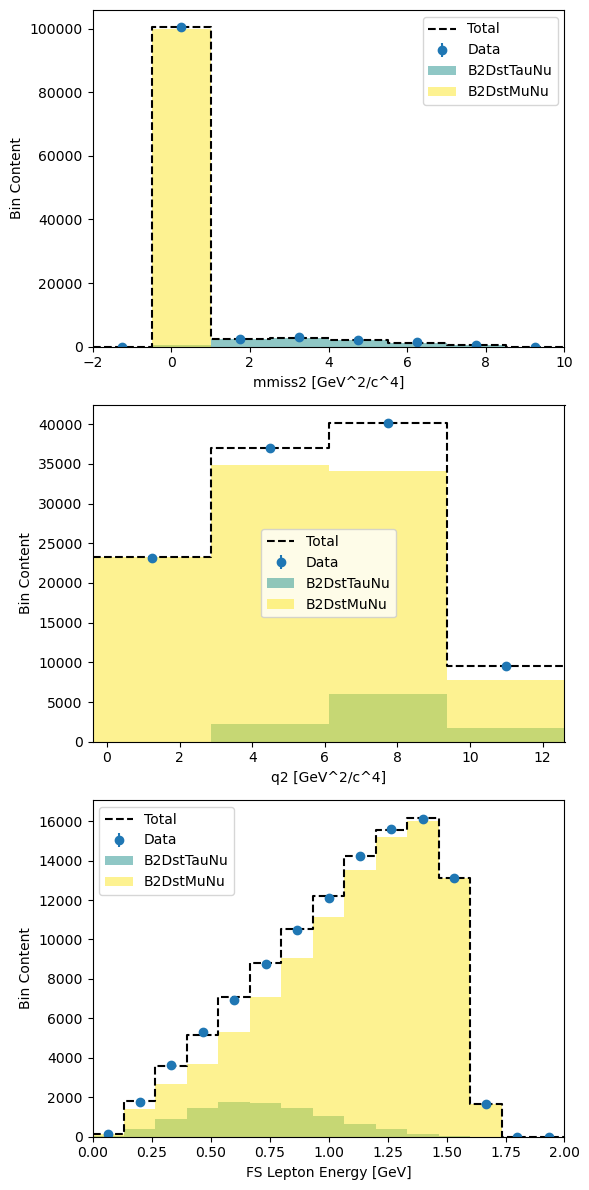

In [2]:
# create the fitter 
# not yet optimized for the pyhf interface
# all the information necessary is stored in a fitter even if it is not (yet) trivial to retrieve

reader = hamf.Reader("B02DstTauNu_TauMu.config")
fitter = reader.createFitter()

params_toy = {"SM" : 1., "Re_S_qLlL" : 0., "Im_S_qLlL" : 0., "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0., "delta_cSt" : 0., "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
fitter._data = fitter._template_list[0].generate_toy(**params_toy) + fitter._template_list[1].generate_toy(**params_toy)

params = {"SM" : 1., "Re_S_qLlL" : 0., "Im_S_qLlL" : 0., "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0., "delta_cSt" : 0., "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
fitter.plot(**params)

In [3]:
# tau wrt parameter

In [4]:
# Definition of the nominal and the alternative models for the pyhf test

def SM_dist_sgnl():
    params_SM = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
    res = np.zeros(fitter._template_list[0]._nobs)
    for temp in fitter._template_list:
        res += temp.generate_template(**params_SM)
    return res
def NP_dist_sgnl(**kwargs):
    #print(kwargs)
    params_NP = {"SM" : kwargs["SM"], "Re_S_qLlL" : kwargs["Re_S_qLlL"], "Im_S_qLlL" : kwargs["Im_S_qLlL"], "Re_S_qRlL" : kwargs["Re_S_qRlL"], "Im_S_qRlL" : kwargs["Im_S_qRlL"],  "Re_V_qLlL" : kwargs["Re_V_qLlL"], "Im_V_qLlL" : kwargs["Im_V_qLlL"], "Re_V_qRlL" : kwargs["Re_V_qRlL"], "Im_V_qRlL" : kwargs["Im_V_qRlL"], "Re_T_qLlL" : kwargs["Re_T_qLlL"], "Im_T_qLlL" : kwargs["Im_T_qLlL"],"delta_RhoSq" : kwargs["FFs[0]"], "delta_cSt" : kwargs["FFs[1]"], "delta_chi21" : kwargs["FFs[2]"], "delta_chi2p" : kwargs["FFs[3]"], "delta_chi3p" : kwargs["FFs[4]"], "delta_eta1" : kwargs["FFs[5]"], "delta_etap" : kwargs["FFs[6]"], "delta_phi1p" : kwargs["FFs[7]"], "delta_beta21" : kwargs["FFs[8]"], "delta_beta3p" : kwargs["FFs[9]"],"lumi" : 1.}
    #params_NP = {"SM" : kwargs["SM"], "Re_S_qLlL" : kwargs["Re_S_qLlL"], "Im_S_qLlL" : kwargs["Im_S_qLlL"], "Re_S_qRlL" : kwargs["Re_S_qRlL"], "Im_S_qRlL" : kwargs["Im_S_qRlL"],  "Re_V_qLlL" : kwargs["Re_V_qLlL"], "Im_V_qLlL" : kwargs["Im_V_qLlL"], "Re_V_qRlL" : kwargs["Re_V_qRlL"], "Im_V_qRlL" : kwargs["Im_V_qRlL"], "Re_T_qLlL" : kwargs["Re_T_qLlL"], "Im_T_qLlL" : kwargs["Im_T_qLlL"],"delta_RhoSq" : kwargs["delta_RhoSq[0]"], "delta_cSt" : kwargs["delta_cSt[0]"], "delta_chi21" : kwargs["delta_chi21[0]"], "delta_chi2p" : kwargs["delta_chi2p[0]"], "delta_chi3p" : kwargs["delta_chi3p[0]"], "delta_eta1" : kwargs["delta_eta1[0]"], "delta_etap" : kwargs["delta_etap[0]"], "delta_phi1p" : kwargs["delta_phi1p[0]"], "delta_beta21" : kwargs["delta_beta21[0]"], "delta_beta3p" : kwargs["delta_beta3p[0]"],"lumi" : 1.}
    res = np.zeros(fitter._template_list[0]._nobs)
    for temp in fitter._template_list:
        res += temp.generate_template(**params_NP)
    return res


In [5]:
# Definition of the custom modifiers as the Wilson coefficients and the eigenvectors of the FFs

new_params = {
                'SM'   :{'inits': (1.,), 'bounds': ((0., 10.),), 'paramset_type': 'unconstrained'},
                'Re_S_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qLlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_S_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qRlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_V_qLlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_V_qRlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_T_qLlL'   :{'inits': (0.,), 'bounds': ((-0.1,0.1),), 'paramset_type': 'unconstrained'},
                'Im_T_qLlL'   :{'inits': (0.,), 'bounds': ((-0.2,0.2),), 'paramset_type': 'unconstrained'},
                'FFs'         :{'inits': (0.,0.,0.,0.,0.,0.,0.,0.,0.,0.), 'bounds': (),
                                'cov': [[0.04*0.04,0.,0.,0.,0.,0.,0.,0.,0.,0.],
                                        [0.,0.23*0.23,0.,0.,0.,0.,0.,0.,0.,0.],
                                        [0.,0.,0.05*0.05,0.,0.,0.,0.,0.,0.,0.],
                                        [0.,0.,0.,0.11*0.11,0.,0.,0.,0.,0.,0.],
                                        [0.,0.,0.,0.,0.01*0.01,0.,0.,0.,0.,0.],
                                        [0.,0.,0.,0.,0.,0.04*0.04,0.,0.,0.,0.],
                                        [0.,0.,0.,0.,0.,0.,0.11*0.11,0.,0.,0.],
                                        [0.,0.,0.,0.,0.,0.,0.,0.21*0.21,0.,0.],
                                        [0.,0.,0.,0.,0.,0.,0.,0.,0.10*0.10,0.],
                                        [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.10*0.10],],
                                'paramset_type': 'constrained_by_normal'}
                #'delta_RhoSq'   :{'inits': (0.1,), 'bounds': ((-3.,3.),), 'cov' : [0.5*0.5], 'paramset_type': 'constrained_by_normal'},
                #'delta_cSt'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0529],'paramset_type': 'constrained_by_normal'},
                #'delta_chi21'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0025],'paramset_type': 'constrained_by_normal'},
                #'delta_chi2p'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0121],'paramset_type': 'constrained_by_normal'},
                #'delta_chi3p'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0001],'paramset_type': 'constrained_by_normal'},
                #'delta_eta1'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.04*0.04], 'paramset_type': 'constrained_by_normal'},
                #'delta_etap'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0121],'paramset_type': 'constrained_by_normal'},
                #'delta_phi1p'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.0441],'paramset_type': 'constrained_by_normal'},
                #'delta_beta21'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.01],'paramset_type': 'constrained_by_normal'},
                #'delta_beta3p'   :{'inits': (0.,), 'bounds': ((-3.,3.),), 'cov' : [0.01],'paramset_type': 'constrained_by_normal'}
                }         


cmod_sgnl = modifier.Modifier(new_params, NP_dist_sgnl, SM_dist_sgnl)
#cmod_norm = modifier.Modifier(new_params, NP_dist_norm, SM_dist_norm)

In [6]:
# we than build a pyhf model

data_init_sgnl = SM_dist_sgnl()
#data_init_norm = SM_dist_norm()

spec = {
  "channels": [
    {
      "name": "doublechannel",
      "samples": [
        {
          "name": "signal",
          "data": data_init_sgnl,
          "modifiers": [
            {
                "name": "mu",
                "type": "normfactor",
                "data": None
            }
          ]
        }
      ]
    } 
  ]
}


model = pyhf.Model(spec)
custom_mod = {
                "name": "custom_modifier",
                "type": "custom",
                "data":
                    {
                        "expr": "custom_weight_fn",
                    }
              }

model = modifier.add_to_model(model, ['doublechannel'], ['signal'], cmod_sgnl.expanded_pyhf, custom_mod)
#model = modifier.add_to_model(model, ['doublechannel'], ['normalization'], cmod_norm.expanded_pyhf, custom_mod)
#model.spec

In [7]:
# print the parameters

model.main_model.modifiers_appliers['custom'].param_viewer.allpar_viewer.names

('SM',
 'Re_S_qLlL',
 'Im_S_qLlL',
 'Re_S_qRlL',
 'Im_S_qRlL',
 'Re_V_qLlL',
 'Im_V_qLlL',
 'Re_V_qRlL',
 'Im_V_qRlL',
 'Re_T_qLlL',
 'Im_T_qLlL',
 'FFs_decorrelated[0]',
 'FFs_decorrelated[1]',
 'FFs_decorrelated[2]',
 'FFs_decorrelated[3]',
 'FFs_decorrelated[4]',
 'FFs_decorrelated[5]',
 'FFs_decorrelated[6]',
 'FFs_decorrelated[7]',
 'FFs_decorrelated[8]',
 'FFs_decorrelated[9]',
 'mu')

In [8]:
# print the parameters' map

model.config.par_map

{'SM': {'slice': slice(0, 1, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8dc0>},
 'Re_S_qLlL': {'slice': slice(1, 2, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8df0>},
 'Im_S_qLlL': {'slice': slice(2, 3, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8e20>},
 'Re_S_qRlL': {'slice': slice(3, 4, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8e50>},
 'Im_S_qRlL': {'slice': slice(4, 5, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8e80>},
 'Re_V_qLlL': {'slice': slice(5, 6, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8eb0>},
 'Im_V_qLlL': {'slice': slice(6, 7, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8ee0>},
 'Re_V_qRlL': {'slice': slice(7, 8, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f14f95b8f10>},
 'Im_V_qRlL': {'slice': slice(8, 9, None),
  'paramset'

In [9]:
# print the correlation infos

cmod_sgnl.corr_infos

{'FFs': {'mean': (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
  'uvec': array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ],
         [0.23, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  ]])}}

In [10]:
# defining the starting values of the d.o.f.

init = model.config.suggested_init()
init[0] = 1. #SM
init[1] = 0. #ReSLL
init[2] = 0. #ImSLL
init[3] = 0. #ReSRL
init[4] = 0. #ImSRL
init[5] = 0. #ReVLL
init[6] = 0. #ImVLL
init[7] = 0. #ReVRL
init[8] = 0. #ImVRL
init[9] = 0. #ReTLL
init[10] = 0. #ImTLL

init[11] = 0.6 #FF1
init[12] = 0. #FF2
init[13] = 0. #FF3
init[14] = 0. #FF4
init[15] = 0. #FF5
init[16] = 0. #FF6
init[17] = 0. #FF7
init[18] = 0. #FF8
init[19] = 0. #FF9
init[20] = 0. #FF10

init[21] = 1. #mu nominal


data = fitter._data.tolist() + model.config.auxdata


In [11]:
# fixing the values of some of the d.o.f.
fixed = model.config.suggested_fixed()
#fixed[0] = True #SM
fixed[1] = True #ReSLL
fixed[2] = True #ImSLL
fixed[3] = True #ReSRL
fixed[4] = True #ImSRL
fixed[5] = True #ReVLL
fixed[6] = True #ImVLL
fixed[7] = True #ReVRL
fixed[8] = True #ImVRL
fixed[9] = True #ReTLL
fixed[10] = True #ImTLL

#fixed[11] = True #FF1
#fixed[12] = True #FF2
#fixed[13] = True #FF3
#fixed[14] = True #FF4
#fixed[15] = True #FF5
#fixed[16] = True #FF6
#fixed[17] = True #FF7
#fixed[18] = True #FF8
#fixed[19] = True #FF9
#fixed[20] = True #FF10
fixed[21] = True # nomi mu


In [12]:
# fit with pyhf

pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=1))
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed, return_uncertainties=True)

# print the hessian
# 

best_fit_dict = modifier.par_dict(model, best_fit)

/home/mcolonna/willsoon/test/modifier.py:153: RuntimeWarning: invalid value encountered in divide
  weights = np.array(alt_binned) / np.array(self.null_binned)


In [13]:
for i in range(len(best_fit)):
    print(f"{model.main_model.modifiers_appliers['custom'].param_viewer.allpar_viewer.names[i]} = {best_fit[i][0]} +/- {best_fit[i][1]}")


SM = 1.0015015150079227 +/- 0.004168056829987221
Re_S_qLlL = 0.0 +/- 0.0
Im_S_qLlL = 0.0 +/- 0.0
Re_S_qRlL = 0.0 +/- 0.0
Im_S_qRlL = 0.0 +/- 0.0
Re_V_qLlL = 0.0 +/- 0.0
Im_V_qLlL = 0.0 +/- 0.0
Re_V_qRlL = 0.0 +/- 0.0
Im_V_qRlL = 0.0 +/- 0.0
Re_T_qLlL = 0.0 +/- 0.0
Im_T_qLlL = 0.0 +/- 0.0
FFs_decorrelated[0] = 0.11634017035727084 +/- 0.7385743820614951
FFs_decorrelated[1] = 0.08102683523241731 +/- 0.9059768452950122
FFs_decorrelated[2] = 0.2535010197437536 +/- 0.8190150602871265
FFs_decorrelated[3] = 0.08424187820930223 +/- 0.9419227269376312
FFs_decorrelated[4] = 0.10226118788083263 +/- 0.9563624898931526
FFs_decorrelated[5] = 0.00386670940613037 +/- 0.9761640281422397
FFs_decorrelated[6] = 0.0785848752069043 +/- 0.8870393346143443
FFs_decorrelated[7] = 0.02681904402223835 +/- 0.9657555250075329
FFs_decorrelated[8] = 0.2919718268973526 +/- 0.7803775400860914
FFs_decorrelated[9] = 0.02160749665134612 +/- 0.991756501288876
mu = 1.0 +/- 0.0


In [14]:
best_fit_rot = cmod_sgnl.rotate_pars({k:v[0] if len(np.shape(v))==1 else [p[0] for p in v] for k, v in best_fit_dict.items()})
best_fit_rot


{'SM': 1.0015015150079227,
 'Re_S_qLlL': 0.0,
 'Im_S_qLlL': 0.0,
 'Re_S_qRlL': 0.0,
 'Im_S_qRlL': 0.0,
 'Re_V_qLlL': 0.0,
 'Im_V_qLlL': 0.0,
 'Re_V_qRlL': 0.0,
 'Im_V_qRlL': 0.0,
 'Re_T_qLlL': 0.0,
 'Im_T_qLlL': 0.0,
 'FFs[0]': 0.011678873075894105,
 'FFs[1]': 0.026758239182172294,
 'FFs[2]': 0.003929243760345215,
 'FFs[3]': 0.027885112171812897,
 'FFs[4]': 0.0002160749665134612,
 'FFs[5]': 0.001072761760889534,
 'FFs[6]': 0.009266606603023246,
 'FFs[7]': 0.017015635398807634,
 'FFs[8]': 0.00038667094061303704,
 'FFs[9]': 0.010226118788083265,
 'mu': 1.0}

In [15]:
def fit_iminuit(fitter,**initial_guess):        
    def chi_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,lumi):
        nll = 2*fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,
                                             delta_RhoSq=delta_RhoSq*0.04,delta_cSt=delta_cSt*0.23,
                                             delta_chi21=delta_chi21*0.05,delta_chi2p=delta_chi2p*0.11,
                                             delta_chi3p=delta_chi3p*0.01,delta_eta1=delta_eta1*0.04,
                                             delta_etap=delta_etap*0.11,delta_phi1p=delta_phi1p*0.21,
                                             delta_beta21=delta_beta21*0.1,delta_beta3p=delta_beta3p*0.1,lumi=lumi)
        gaussian_constraints = [
                                0.5*(delta_RhoSq)**2,
                                0.5*(delta_cSt)**2,
                                0.5*(delta_chi21)**2,
                                0.5*(delta_chi2p)**2,
                                0.5*(delta_chi3p)**2,
                                0.5*(delta_eta1)**2,
                                0.5*(delta_etap)**2,
                                0.5*(delta_phi1p)**2,
                                0.5*(delta_beta21)**2,
                                0.5*(delta_beta3p)**2
        
        ]
        for constraints in gaussian_constraints:
            nll += constraints
        return nll
    # Create the Minuit object using the initial guess
    m = Minuit(chi_wrapped, **initial_guess)

    m.limits['SM'] = (0.5,1.5) #fast

    m.limits['Re_S_qLlL'] = (0.,0.)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (0.,0.)
    m.limits['Im_S_qLlL'] = (0.,0.)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (0.,0.)
    
#    m.limits['Re_S_qLlL'] = (-2.,2.)
#    m.limits['Re_S_qRlL'] = (-2.,2.)
#    m.limits['Re_V_qLlL'] = (-2.,2.)
#    m.limits['Re_V_qRlL'] = (-2.,2.)
#    m.limits['Re_T_qLlL'] = (-2.,2.)
#    m.limits['Im_S_qLlL'] = (-2.,2.)
#    m.limits['Im_S_qRlL'] = (-2.,2.)
#    m.limits['Im_V_qLlL'] = (-2.,2.)
#    m.limits['Im_V_qRlL'] = (-2.,2.)
#    m.limits['Im_T_qLlL'] = (-2.,2.)
    
#    m.limits['delta_RhoSq'] = (0.,0.)
#    m.limits['delta_cSt'] = (0.,0.)
#    m.limits['delta_chi21'] = (0.,0.) #fixed by VRL correlation
#    m.limits['delta_chi2p'] = (0.,0.)
#    m.limits['delta_chi3p'] = (0.,0.) 
#    m.limits['delta_eta1'] = (0.,0.) #fixed by VRL
#    m.limits['delta_etap'] = (0.,0.) #fixed by VRL
#    m.limits['delta_phi1p'] = (0.,0.) 
#    m.limits['delta_beta21'] = (0.,0.) 
#    m.limits['delta_beta3p'] = (0.,0.) 
    
    m.limits['delta_RhoSq'] = (-3.,3.)
    m.limits['delta_cSt'] = (-3.,3.)
    m.limits['delta_chi21'] = (-3.,3.) #fixed by VRL correlation
    m.limits['delta_chi2p'] = (-3.,3.)
    m.limits['delta_chi3p'] = (-3.,3.) 
    m.limits['delta_eta1'] = (-3.,3.) #fixed by VRL
    m.limits['delta_etap'] = (-3.,3.) #fixed by VRL
    m.limits['delta_phi1p'] = (-3.,3.) 
    m.limits['delta_beta21'] = (-3.,3.) 
    m.limits['delta_beta3p'] = (-3.,3.) 
        
    m.limits['lumi'] = (1.,1.)
    m.strategy = 1
    m.tol = 0.1
    m.errordef = 0.5#Minuit.LIKELIHOOD
    # Perform the minimization
    m.migrad()
    m.hesse()
    values = []
    errors = []
    for param in m.parameters:
        value = m.values[param]
        values.append(value)
        error = m.errors[param]
        errors.append(error)
        print(f"{param}: {value:.4f} ± {error:.4f}")
    # Return the optimized values
    result_dict = dict(zip(m.parameters, values))
    error_dict = dict(zip(m.parameters, errors))
    #fitter.plot(**result_dict)
    #return result_dict, error_dict

In [16]:
initial_guess = {
                'SM': 1., 
                'Re_S_qLlL': 0.0,
                'Im_S_qLlL': 0.0,
                'Re_S_qRlL': 0.0,
                'Im_S_qRlL': 0.0,
                'Re_V_qLlL': 0.0,
                'Im_V_qLlL': 0.0,
                'Re_V_qRlL': 0.0,
                'Im_V_qRlL': 0.0,
                'Re_T_qLlL': 0.0,
                'Im_T_qLlL': 0.0,
                "delta_RhoSq" : 0.0, 
                "delta_cSt" : 0.0, 
                "delta_chi21" : 0.0, 
                "delta_chi2p" : 0.0, 
                "delta_chi3p" : 0.0, 
                "delta_eta1" : 0.0, 
                "delta_etap" : 0.0, 
                "delta_phi1p" : 0.0, 
                "delta_beta21" : 0.0, 
                "delta_beta3p" : 0.0,
                'lumi': 1.
            }

fit_iminuit(fitter,**initial_guess)
print("--------------------------------")
# print the result from the fit
for i in range(len(best_fit)):
    print(f"{model.main_model.modifiers_appliers['custom'].param_viewer.allpar_viewer.names[i]} = {best_fit[i][0]} +/- {best_fit[i][1]}")


# plot directly from pyhf


W VariableMetricBuilder Reached machine accuracy limit; Edm 0.000666871 is smaller than machine limit 0.100905 while 0.0001 was requested
SM: 1.0016 ± 0.0032
Re_S_qLlL: 0.0000 ± 0.1000
Im_S_qLlL: 0.0000 ± 0.1000
Re_S_qRlL: 0.0000 ± 0.1000
Im_S_qRlL: 0.0000 ± 0.1000
Re_V_qLlL: 0.0000 ± 0.1000
Im_V_qLlL: 0.0000 ± 0.1000
Re_V_qRlL: 0.0000 ± 0.1000
Im_V_qRlL: 0.0000 ± 0.1000
Re_T_qLlL: 0.0000 ± 0.1000
Im_T_qLlL: 0.0000 ± 0.1000
delta_RhoSq: 0.4377 ± 0.7440
delta_cSt: 0.0159 ± 0.6652
delta_chi21: 0.1162 ± 0.8736
delta_chi2p: 0.4047 ± 0.7895
delta_chi3p: 0.0274 ± 0.9799
delta_eta1: 0.0477 ± 0.9491
delta_etap: 0.1243 ± 0.9270
delta_phi1p: 0.1443 ± 0.8901
delta_beta21: 0.0171 ± 0.9645
delta_beta3p: 0.1373 ± 0.9410
lumi: 1.0000 ± 0.0100
--------------------------------
SM = 1.0015015150079227 +/- 0.004168056829987221
Re_S_qLlL = 0.0 +/- 0.0
Im_S_qLlL = 0.0 +/- 0.0
Re_S_qRlL = 0.0 +/- 0.0
Im_S_qRlL = 0.0 +/- 0.0
Re_V_qLlL = 0.0 +/- 0.0
Im_V_qLlL = 0.0 +/- 0.0
Re_V_qRlL = 0.0 +/- 0.0
Im_V_qRlL = 

In [17]:
# integrated with REDIST
# 2 x packages
# simplicitic examples one for iminuit 1
#
# simplistic example including the background
#
# for the paper: show that the systematic are improved by the combination
#
# compare hadronic tau and muonic tau:
# run3 hadronic vs muonic : b->c
#
# pseudoscalar decay (barionic decay)